In [31]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

input_dir = "../data_clean/"
visuals_dir = "../visuals/"

In [35]:
df_person = pd.read_pickle(os.path.join(input_dir, 'df_person.pkl'))
df_bio = pd.read_pickle(os.path.join(input_dir, 'df_bio.pkl'))
df_note = pd.read_pickle(os.path.join(input_dir, 'df_note.pkl'))
df_visit = pd.read_pickle(os.path.join(input_dir, 'df_visit.pkl'))
df_condition = pd.read_pickle(os.path.join(input_dir, 'df_condition.pkl'))

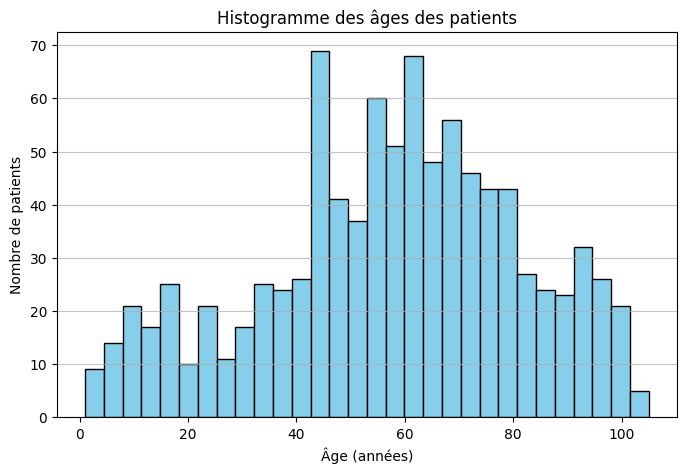

In [36]:
current_year = datetime.now().year
df_person = df_person.copy()
df_person = df_person[df_person['birth_datetime'].notna()]
df_person['age'] = current_year - df_person['birth_datetime'].dt.year

plt.figure(figsize=(8, 5))
plt.hist(df_person['age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Âge (années)')
plt.ylabel('Nombre de patients')
plt.title('Histogramme des âges des patients')
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join(visuals_dir, 'patients_age_histogram.png'))

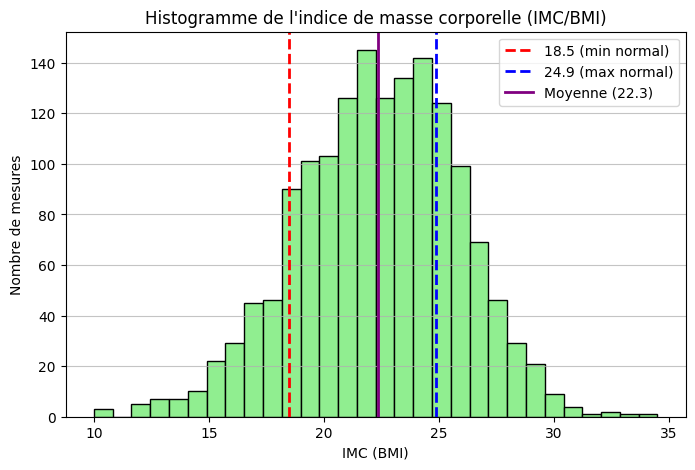

In [38]:
bmi_values = df_bio[df_bio['concept_source_value'] == 'bmi']['transformed_value'].dropna()


plt.figure(figsize=(8, 5))
plt.hist(bmi_values, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('IMC (BMI)')
plt.ylabel('Nombre de mesures')
plt.title("Histogramme de l'indice de masse corporelle (IMC/BMI)")
plt.grid(axis='y', alpha=0.75)

# Barres pontillées pour les seuils OMS
plt.axvline(18.5, color='red', linestyle='dashed', linewidth=2, label='18.5 (min normal)')
plt.axvline(24.9, color='blue', linestyle='dashed', linewidth=2, label='24.9 (max normal)')

# Barre pour la moyenne
bmi_mean = bmi_values.mean()
plt.axvline(bmi_mean, color='purple', linestyle='solid', linewidth=2, label=f'Moyenne ({bmi_mean:.1f})')

plt.legend()
plt.savefig(os.path.join(visuals_dir, 'bmi_histogram.png'))